In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
def equation_to_fit(x, Vmax, Kd):
    return (Vmax * x) / (Kd + x)

In [6]:
#path = "/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/TestData.csv"
MyData = pd.read_excel('/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/TestData.csv', sheetname='TestData')
MyData

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'x,y\r\n1,1'

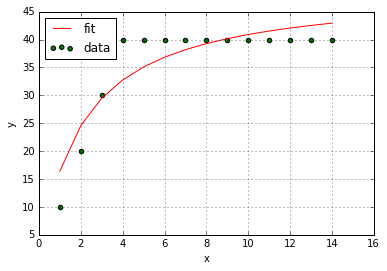

[ 49.03115323   1.99060914]
[ 3.13737158  0.5322556 ]


In [5]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [1,1]
low_bounds = [0,0]
up_bounds = [1000, 1000]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.x, MyData.y, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))

#plt.plot(MyData.x, y_truedata, c='b', label='true')
plt.scatter(MyData.x, MyData.y, c='g', label='data')
plt.plot(MyData.x, equation_to_fit(MyData.x, *fit_params), c='r', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.grid()
plt.show()
print(fit_params)
print(std_dev_error_of_fit_params)